# E-Commerce – EDA – Python Project

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("Ecommerce - UK Retailer.csv")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12-01-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12-01-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12-01-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12-01-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12-01-2010 08:34,1.69,13047.0,United Kingdom


# Data Cleanning

In [17]:
df[df["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12-01-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12-01-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12-01-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-09-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12-09-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-09-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-09-2011 11:58,1.25,17315.0,United Kingdom


In [23]:
#Remove negative values in column 'Quantity'
df_new = df[(df['Quantity'] >= 0)]

In [24]:
#Check for missing values in all columns and replace them with the appropriate metric
# In our data there is no missing/blank value in main column 'Quantity','UnitPrice','Country','InvoiceDate'
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


## Update the data

In [25]:
#Add the columns - Month, Day and Hour for the invoice
df_new['InvoiceDate'] = df_new['InvoiceDate'].astype('datetime64[ns]')
df_new['Year'] = df_new.InvoiceDate.dt.year
df_new['Month'] = df_new.InvoiceDate.dt.month
df_new['year_month']=df_new.InvoiceDate.map(lambda x: 100*x.year +  x.month)
df_new['Day']=(df_new.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
df_new['Hour'] = df_new.InvoiceDate.dt.hour
df_new['Revenue'] = df_new['Quantity'] * df_new['UnitPrice']
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34


In [26]:
#Aggregation for all numerical Columns
df_new.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,year_month,Day,Hour,Revenue
count,531285.000000,531285.000000,397924.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.00000
mean,10.655262,3.857296,15294.315171,2010.921543,7.560244,201099.714549,3.435561,13.076259,20.03550
std,156.830323,41.810047,1713.169877,0.268890,3.508717,25.800406,1.849816,2.438303,270.91237
min,1.000000,-11062.060000,12346.000000,2010.000000,1.000000,201012.000000,1.000000,6.000000,-11062.06000
25%,1.000000,1.250000,13969.000000,2011.000000,5.000000,201103.000000,2.000000,11.000000,3.75000
50%,3.000000,2.080000,15159.000000,2011.000000,8.000000,201107.000000,3.000000,13.000000,9.90000
75%,10.000000,4.130000,16795.000000,2011.000000,11.000000,201110.000000,5.000000,15.000000,17.70000
max,80995.000000,13541.330000,18287.000000,2011.000000,12.000000,201112.000000,7.000000,20.000000,168469.60000


# 1. Perform Basic EDA

In [27]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### a. Boxplot – All Numeric Variables 

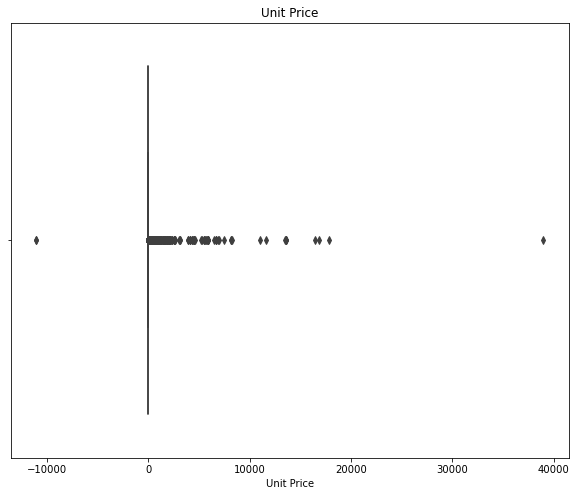

In [28]:
# Box Plot
plt.subplots(figsize=(10,8))
sns.boxplot(df.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.show()

### b. Histogram – All Numeric Variables

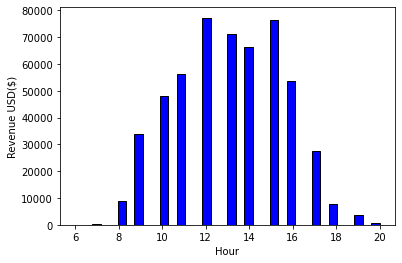

In [29]:
# Histogram (graphical representation of numerical data distribution)
plt.hist(df_new['Hour'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.xlabel('Hour')
plt.ylabel('Revenue USD($)')
plt.show()

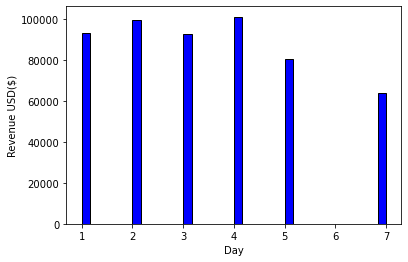

In [30]:
plt.hist(df_new['Day'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.xlabel('Day')
plt.ylabel('Revenue USD($)')
plt.show()

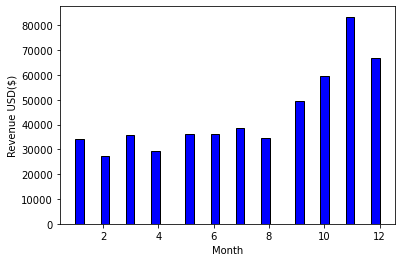

In [31]:
plt.hist(df_new['Month'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Month')
plt.ylabel('Revenue USD($)')
plt.show()

### c. Distribution Plot – All Numeric Variables

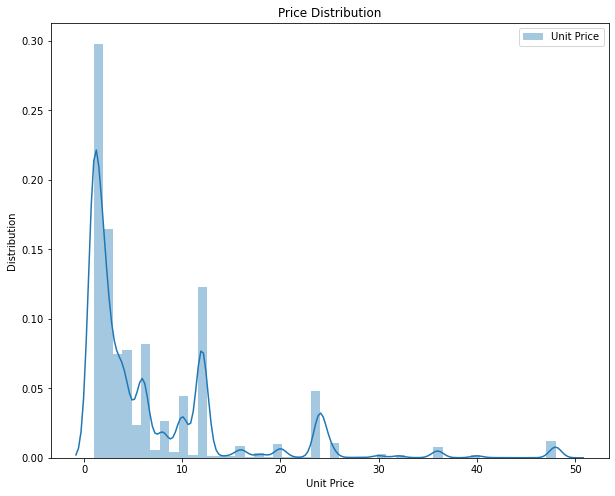

In [33]:
# distribition plot (Skewed +ve)
# If a data set has a positive skew, 
# but the mean of the returns is negative, it means that overall performance is negative
# but here mean is positive hence performance is considerd as to be good
plt.subplots(figsize=(10,8))
sns.distplot(df_new.Quantity[df_new.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()

### d. Aggregation for all numerical Columns

In [34]:
#Aggregation for all numerical Columns
df_new.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,year_month,Day,Hour,Revenue
count,531285.000000,531285.000000,397924.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.00000
mean,10.655262,3.857296,15294.315171,2010.921543,7.560244,201099.714549,3.435561,13.076259,20.03550
std,156.830323,41.810047,1713.169877,0.268890,3.508717,25.800406,1.849816,2.438303,270.91237
min,1.000000,-11062.060000,12346.000000,2010.000000,1.000000,201012.000000,1.000000,6.000000,-11062.06000
25%,1.000000,1.250000,13969.000000,2011.000000,5.000000,201103.000000,2.000000,11.000000,3.75000
50%,3.000000,2.080000,15159.000000,2011.000000,8.000000,201107.000000,3.000000,13.000000,9.90000
75%,10.000000,4.130000,16795.000000,2011.000000,11.000000,201110.000000,5.000000,15.000000,17.70000
max,80995.000000,13541.330000,18287.000000,2011.000000,12.000000,201112.000000,7.000000,20.000000,168469.60000


### e. Unique Values across all columns

In [36]:
#Unique values across colmn
#.ravel(): as below
#returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
pd.unique(df_new[['Country','Description','StockCode','CustomerID']].values.ravel())

array(['United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER', '85123A',
       ..., 'PAPER CRAFT , LITTLE BIRDIE', '23843', 12713.0], dtype=object)

### f. Duplicate values across all columns

In [39]:
#Remove duplicate rows
df_new.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,201112,5,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,201112,5,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,201112,5,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,201112,5,12,16.60


In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
 8   Year         531285 non-null  int64         
 9   Month        531285 non-null  int64         
 10  year_month   531285 non-null  int64         
 11  Day          531285 non-null  int64         
 12  Hour         531285 non-null  int64         
 13  Revenue      531285 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 60.8+ MB


### Correlation – Heatmap - All Numeric Variables

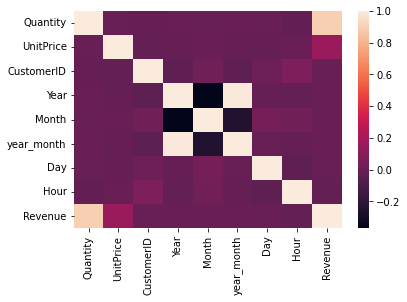

In [41]:
# Heat Map
sns.heatmap(df_new.corr())
plt.show()

### h. Regression Plot - All Numeric Variables

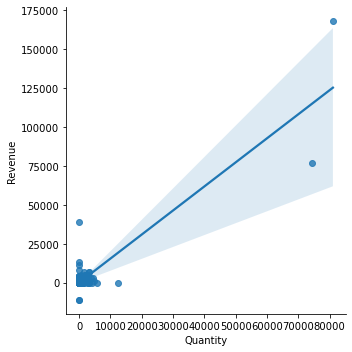

In [42]:
sns.lmplot(x='Quantity',y='Revenue',data=df_new)

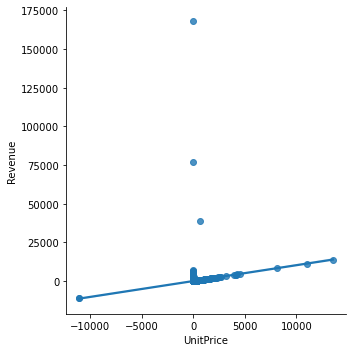

In [91]:
sns.lmplot(x='UnitPrice',y='Revenue',data=df_new)

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable

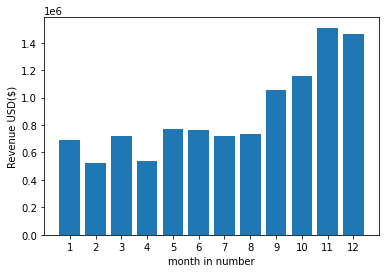

In [45]:
# Bar Plot 
result=df_new.groupby('Month').sum()
month=range(1,13)
plt.bar(month,result['Revenue'])
plt.xticks(month)
plt.xlabel('month in number')
plt.ylabel('Revenue USD($)')
plt.show()

### j. Pair plot - All Numeric Variables

In [ ]:
sns.pairplot(df_new,vars=["Quantity","UnitPrice","Revenue","Month","Day"])
plt.show()

### k. Line chart to show the trend of data - All Numeric/Date Variables

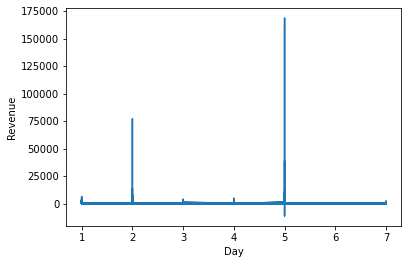

In [46]:
#Line chart to show the trend of data 

plt.plot(df_new['Day'],df_new['Revenue'])
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

### l. Plot the skewness - All Numeric Variables

In [47]:
# skewness 
df_new.skew(axis=0,skipna=True)

Quantity      460.130967
UnitPrice      60.552895
CustomerID      0.025776
Year           -3.135448
Month          -0.417780
year_month     -3.047498
Day             0.466762
Hour            0.000429
Revenue       502.218534
dtype: float64

In [48]:
# skewness 
df_new.skew(axis=1,skipna=True)

0         2.957284
1         2.957288
2         2.957290
3         2.957288
4         2.957288
            ...   
541904    2.978223
541905    2.978222
541906    2.978224
541907    2.978224
541908    2.978223
Length: 531285, dtype: float64

### 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [49]:
df_new.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
Year                0
Month               0
year_month          0
Day                 0
Hour                0
Revenue             0
dtype: int64

### 3. Remove duplicate rows

In [50]:
#Remove duplicate rows
df_new.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,201112,5,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,201112,5,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,201112,5,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,201112,5,12,16.60


### 4. Remove rows which have negative values in Quantity column

In [51]:
## remove negative values in colmn 'Quantity'
df_new = df[(df['Quantity'] >= 0)]

In [52]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [53]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


### 5. Add the columns - Month, Day and Hour for the invoice

In [54]:
#Add the columns - Month, Day and Hour for the invoice
df_new['InvoiceDate'] = df_new['InvoiceDate'].astype('datetime64[ns]')
df_new['Year'] = df_new.InvoiceDate.dt.year
df_new['Month'] = df_new.InvoiceDate.dt.month
df_new['year_month']=df_new.InvoiceDate.map(lambda x: 100*x.year +  x.month)
df_new['Day']=(df_new.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
df_new['Hour'] = df_new.InvoiceDate.dt.hour
df_new['Revenue'] = df_new['Quantity'] * df_new['UnitPrice']
df_new.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34


### 6. How many orders made by the customers?

In [55]:
index = pd.Index(df_new['Quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 531285


### 7. TOP 5 customers with higher number of orders

In [56]:
total_order=df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(10)
print(total_order)

   CustomerID         Country  InvoiceNo
0     12346.0  United Kingdom          1
1     12347.0         Iceland        182
2     12348.0         Finland         31
3     12349.0           Italy         73
4     12350.0          Norway         17
5     12352.0          Norway         85
6     12353.0         Bahrain          4
7     12354.0           Spain         58
8     12355.0         Bahrain         13
9     12356.0        Portugal         59


In [57]:
total_order.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
1,12347.0,Iceland,182
5,12352.0,Norway,85
3,12349.0,Italy,73
9,12356.0,Portugal,59
7,12354.0,Spain,58


### 8. How much money spent by the customers?

In [58]:
df_new['Revenue'].sum()

10644560.424

In [59]:
money_spent = df_new.groupby(by=['CustomerID','Country'],as_index=False)['Revenue'].sum()
print(money_spent)

      CustomerID         Country   Revenue
0        12346.0  United Kingdom  77183.60
1        12347.0         Iceland   4310.00
2        12348.0         Finland   1797.24
3        12349.0           Italy   1757.55
4        12350.0          Norway    334.40
...          ...             ...       ...
4342     18280.0  United Kingdom    180.60
4343     18281.0  United Kingdom     80.82
4344     18282.0  United Kingdom    178.05
4345     18283.0  United Kingdom   2094.88
4346     18287.0  United Kingdom   1837.28

[4347 rows x 3 columns]


### 9. TOP 5 customers with highest money spent

In [60]:
money_spent.sort_values(by=['Revenue'],ascending=False).head()

,CustomerID,Country,Revenue
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


### 10. How many orders per month?

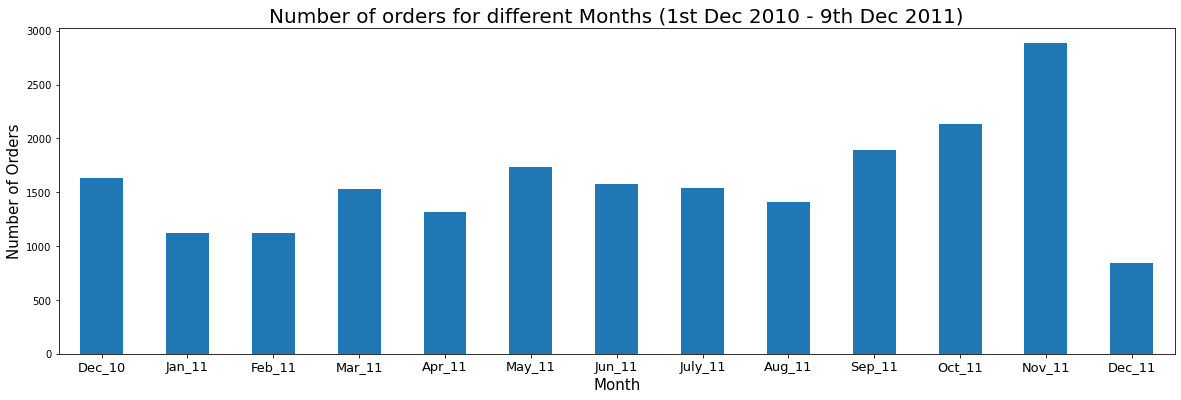

In [61]:
order_per_month = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(20,6))
order_per_month.set_xlabel('Month',fontsize=15)
order_per_month.set_ylabel('Number of Orders',fontsize=15)
order_per_month.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=20)
order_per_month.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

### 11. How many orders per day?

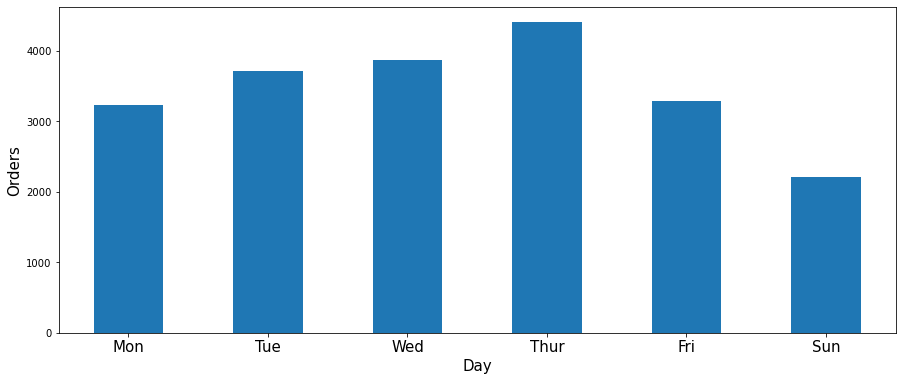

In [66]:
order_per_day = df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
order_per_day.set_xlabel('Day',fontsize=15)
order_per_day.set_ylabel('Orders',fontsize=15)
order_per_day.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

### 12. How many orders per hour?

In [ ]:
ax = df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=13)
ax.set_ylabel('Number of Orders',fontsize=13)
ax.set_title('Number of Hours',fontsize=13)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()

### 13. How many orders for each country?

In [38]:
df_new.groupby('Country')['InvoiceNo'].count()

Country
Australia                 1185
Austria                    398
Bahrain                     18
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            748
Cyprus                     614
Czech Republic              25
Denmark                    380
EIRE                      7894
European Community          60
Finland                    685
France                    8408
Germany                   9042
Greece                     145
Hong Kong                  284
Iceland                    182
Israel                     295
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2363
Norway                    1072
Poland                     330
Portugal                  1501
RSA                         58
Saudi Arabia                 9
Singapore                  222
Spain                     2485


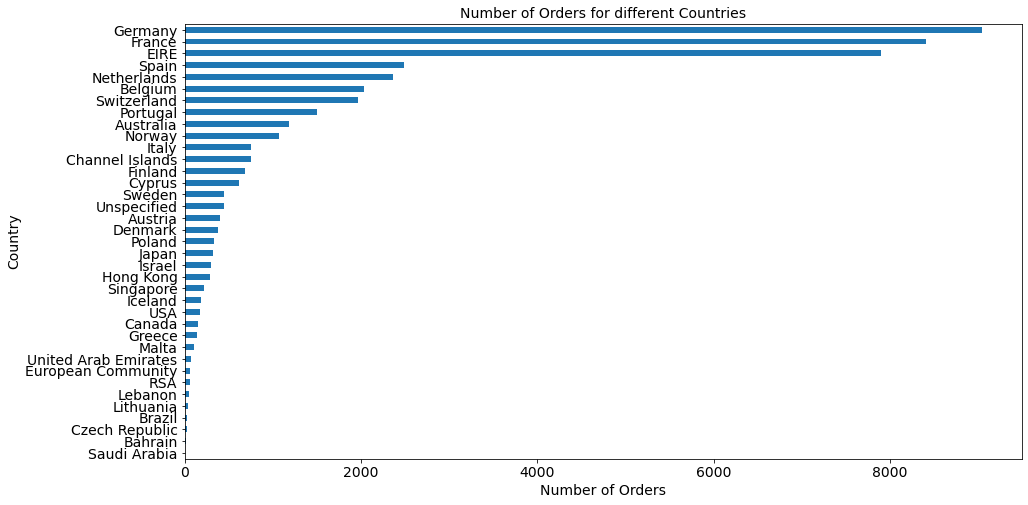

In [39]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

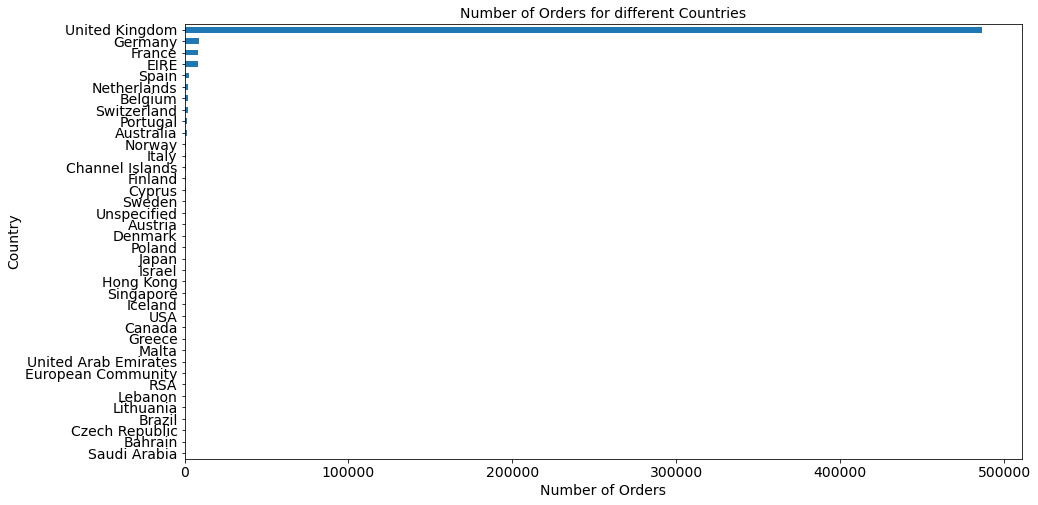

In [40]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
#del group_country_orders['United Kingdom']

# number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

### 14. Orders trend across months

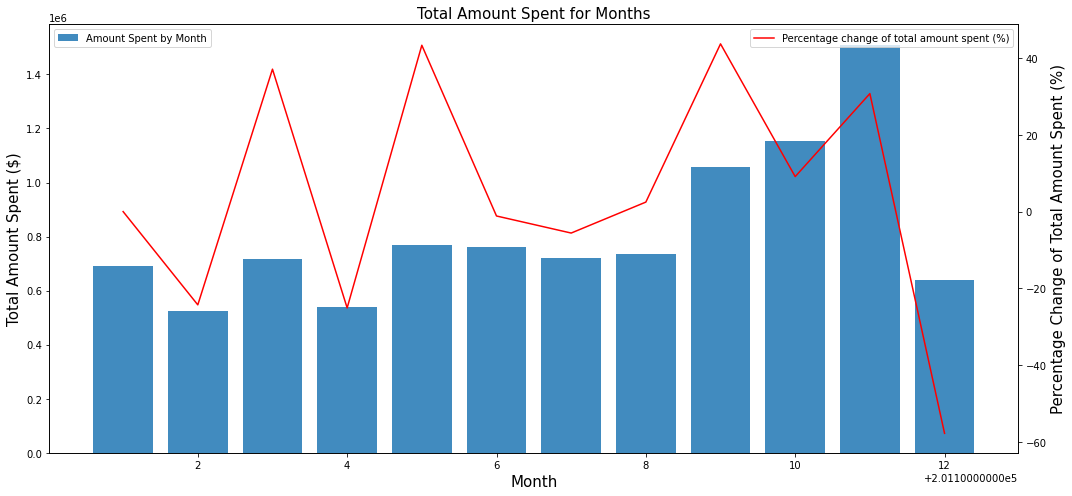

In [63]:
# trend plot
fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:],
        df_new.groupby(by=['year_month'])['Revenue'].sum()[1:],
        alpha=0.85,#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
        label='Amount Spent by Month')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

#pct_change()Percentage change between the current and a prior element.
x2.plot(df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:], 
         df_new.groupby(by=['year_month'])['Revenue'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

### 15. How much money spent by each country?

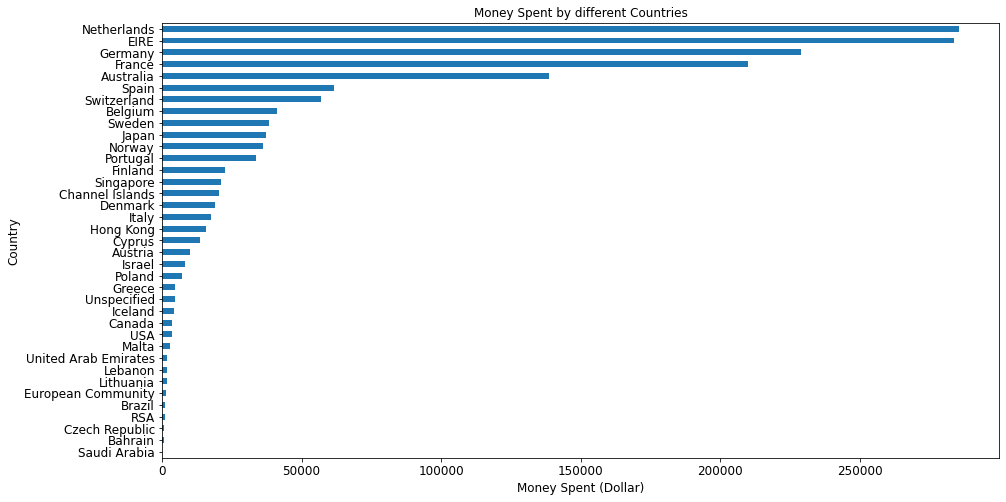

In [65]:
group_country_amount_spent = df_new.groupby('Country')['Revenue'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

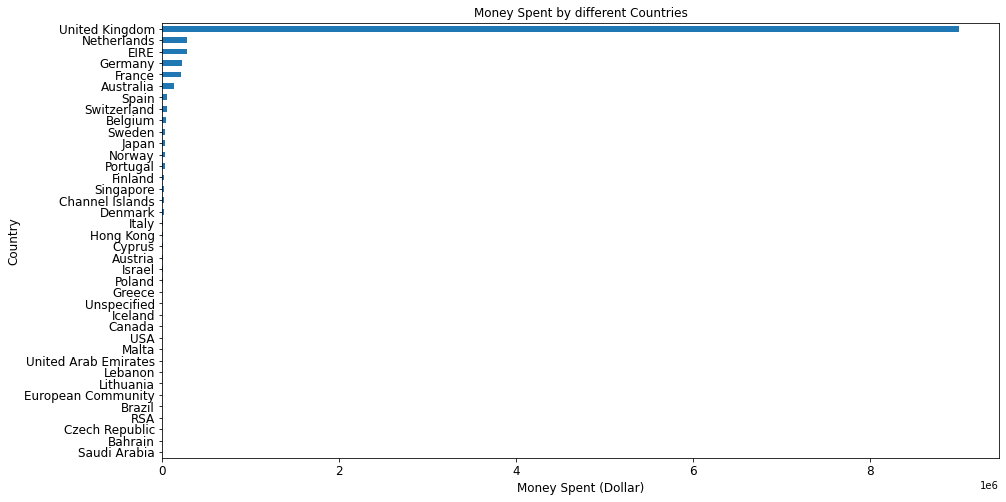

In [67]:
group_country_amount_spent = df_new.groupby('Country')['Revenue'].sum().sort_values()
#del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()